In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [2]:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

In [4]:
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [7]:
x_train

array([[  3.29999995],
       [  4.4000001 ],
       [  5.5       ],
       [  6.71000004],
       [  6.92999983],
       [  4.16800022],
       [  9.77900028],
       [  6.18200016],
       [  7.59000015],
       [  2.16700006],
       [  7.04199982],
       [ 10.79100037],
       [  5.3130002 ],
       [  7.99700022],
       [  3.0999999 ]], dtype=float32)

In [8]:
y_train

array([[ 1.70000005],
       [ 2.75999999],
       [ 2.08999991],
       [ 3.19000006],
       [ 1.69400001],
       [ 1.57299995],
       [ 3.36599994],
       [ 2.59599996],
       [ 2.52999997],
       [ 1.22099996],
       [ 2.8269999 ],
       [ 3.46499991],
       [ 1.64999998],
       [ 2.90400004],
       [ 1.29999995]], dtype=float32)

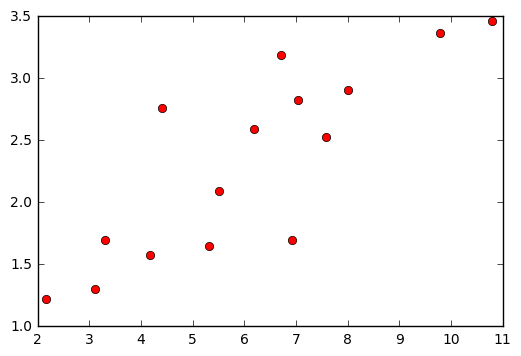

In [9]:
%matplotlib inline
plt.plot(x_train, y_train, 'ro')

In [10]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [11]:
model = LinearRegression(input_size, output_size)

In [12]:
model

LinearRegression (
  (linear): Linear (1 -> 1)
)

In [13]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
for epoch in range(num_epochs):
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, loss.data[0]))

Epoch [5/60], Loss: 2.9195
Epoch [10/60], Loss: 1.2832
Epoch [15/60], Loss: 0.6203
Epoch [20/60], Loss: 0.3518
Epoch [25/60], Loss: 0.2430
Epoch [30/60], Loss: 0.1989
Epoch [35/60], Loss: 0.1811
Epoch [40/60], Loss: 0.1738
Epoch [45/60], Loss: 0.1709
Epoch [50/60], Loss: 0.1697
Epoch [55/60], Loss: 0.1692
Epoch [60/60], Loss: 0.1690


In [23]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

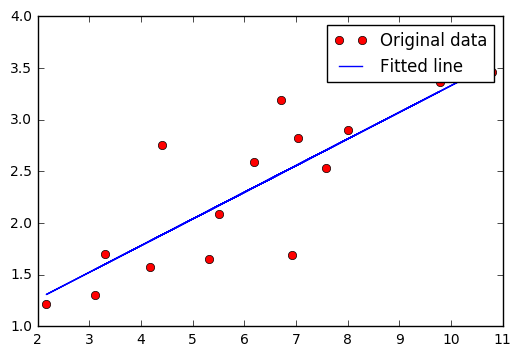

In [29]:
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [30]:
torch.save(model.state_dict(), 'model.pkl')

In [31]:
ls

170912-tutorial.ipynb           171012-linear-regression.ipynb
170913-learning-pytorch.ipynb   data/
170913-pytorch-basics.ipynb     mnist.py
171010-simple-gan.ipynb         model.pkl
171011-pytorch-basics.ipynb     params.pkl
